****Cafelura - Analisando as vendas****

In [8]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [9]:
cafelura = pd.read_csv('./data/cafelura.csv', sep=',')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [10]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [11]:
print("Quantidade de linhas e coluna: {}".format(cafelura.shape))
print("Quantidade de dados nulos: {}".format(cafelura.isna().sum().sum()))

Quantidade de linhas e coluna: (24, 2)
Quantidade de dados nulos: 0


In [12]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Aumento e aceleração do número de assinantes**

In [14]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data= dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax=ax

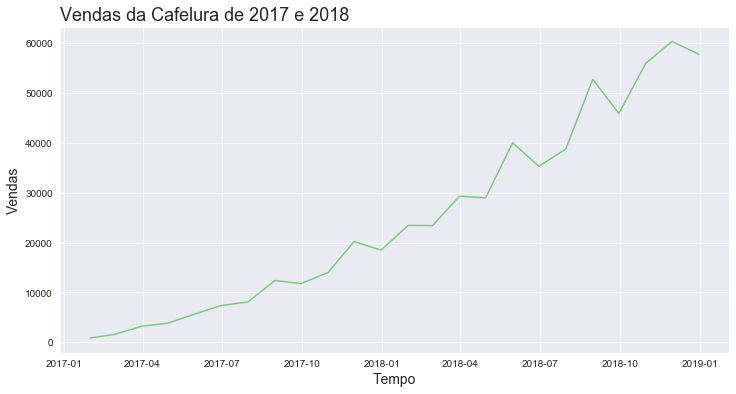

In [15]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)